W mean value is 3.9923247734443637
b mean value is 5.064378722134034
<tf.Variable 'Variable:0' shape=(1,) dtype=float64, numpy=array([1.])> <tf.Variable 'Variable:0' shape=(1,) dtype=float64, numpy=array([1.])>
======== Start Testing ======> Running learning rate: 1


Still running, current step is: 500
Still running, current step is: 1000
Still running, current step is: 1500
Still running, current step is: 2000
Still running, current step is: 2500
Still running, current step is: 3000
Still running, current step is: 3500
Still running, current step is: 4000
Still running, current step is: 4500
Still running, current step is: 5000
Still running, current step is: 5500
Still running, current step is: 6000
Still running, current step is: 6500
Still running, current step is: 7000
Still running, current step is: 7500
Still running, current step is: 8000
Still running, current step is: 8500
Still running, current step is: 9000
Still running, current step is: 9500
Still running, current step i

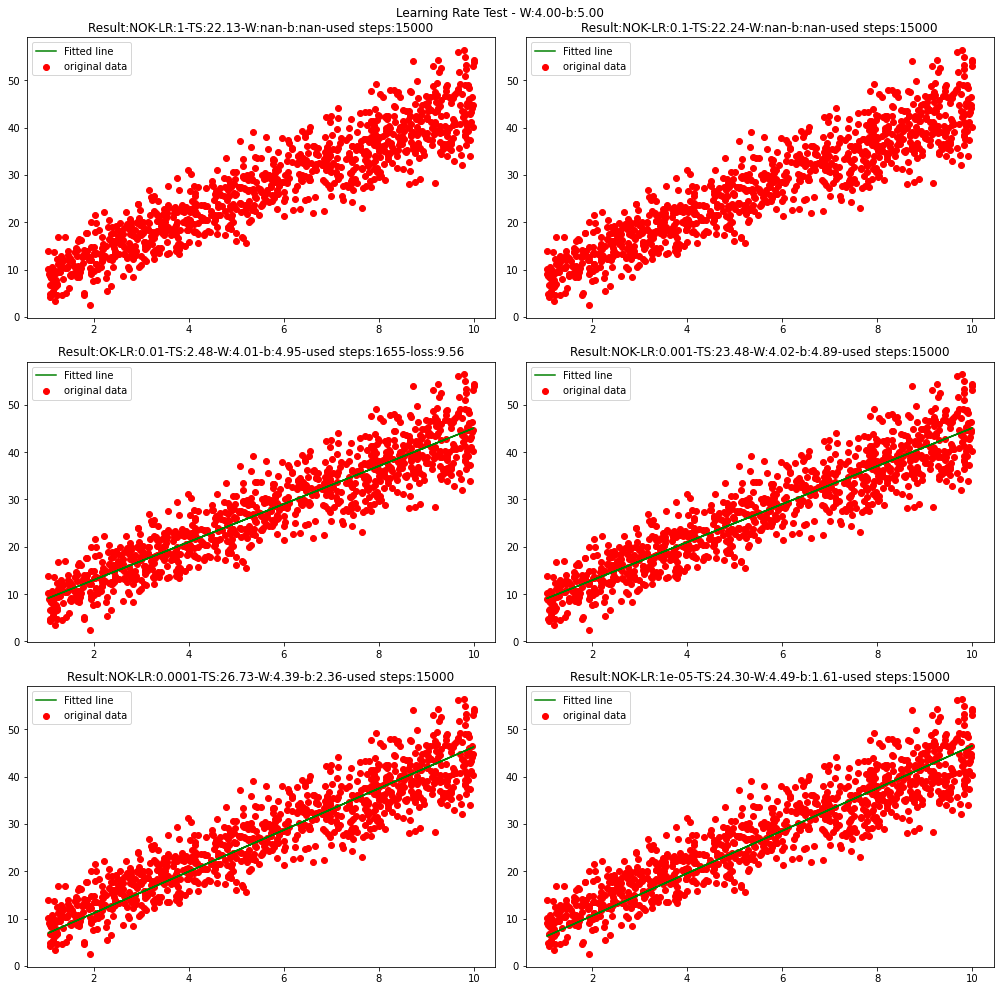

In [3]:
# This program trys to use Tensorflow to do training on same randomly generated data using different learning rate. 
# It will compare the time spent, if it's converge and the loss value.
# This is not implementing the class defined as earlier

import sys
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time

learning_rate = [1, 0.1, 0.01, 0.001, 0.0001, 0.00001]  # the learning rate we want to study
Cols = 2  # number of columes in the figure
testResult = "NOK"  # identify if the test is OK or not
training_step = 15000  # specify training steps
used_step = 5000  # this is for figure plot
display_step = 500  # to control the display step number
Rows = len(learning_rate) // Cols  # determine how many rows of subplots in the figure
Rows += len(learning_rate) % Cols  # the extra row if it's not divided
w_loc = 4  # local value of w
w_scale = 0.5  # scale of w
b_loc = 5  # local value of b
b_scale = 3  # scale of b
x_low = 1  # low range of x samples
x_high = 10  # high range of x samples
W_init = 1  # initial value of W
b_init = 1  # initial value of b
n_samples = 1000  # number of samples
loss_value = 0.0
n_samples = n_samples  # number of samples to be used for training data

# generate random distribution of w and b using normal distribution
w_dis = np.random.normal(w_loc, w_scale, n_samples)  # given a range, generate samples for w
b_dis = np.random.normal(b_loc, b_scale, n_samples)  # given a range, generate samples for b

w_constant = np.mean(w_dis)  # get mean of w
b_constant = np.mean(b_dis)  # get mean of b

print("W mean value is", w_constant)
print("b mean value is", b_constant)

# construct input X and output Y
X = np.random.uniform(x_low, x_high, n_samples)  # given a range, generate samples for x
Y = np.multiply(X, w_dis) + b_dis  # based on X, W, b, we will have Y (output) as trained data

# Define TF variable W and b
# Instead of using random value, we can use defined initial value of W and b
W = tf.Variable([W_init], dtype=tf.float64)  # this W variable is to be determinded by TF
b = tf.Variable([b_init], dtype=tf.float64)  # this b variable is to be determinded by TF

print(W, b)

def linear_regression(x):
    return W * x + b  # construct linear regression model

def mean_square(y_pred, y_value):
    return tf.reduce_sum(tf.pow(y_pred - y_value, 2)) / (2 * n_samples)  # calculate mean square

fig = plt.figure(figsize=(14, 14))
fig.suptitle('Learning Rate Test - W:' + '%.2f' % w_loc + '-b:' + '%.2f' % b_loc)

for i in range(len(learning_rate)):

    testResult = "NOK"  # reset test result mark each iteration
    loss_value = 0.0
    print("======== Start Testing ======> Running learning rate:", learning_rate[i])
    print("\n")

    optimizer = tf.optimizers.SGD(learning_rate[i])
    start = time.time()
    for step in range(1, training_step + 1):
        with tf.GradientTape() as g:
            pred = linear_regression(X)  # based on given X, do a predict
            loss = mean_square(pred, Y)  # calculate the loss
        gradients = g.gradient(loss, [W, b])  # use gradient to do differentiation of loss over W and b
        optimizer.apply_gradients(zip(gradients, [W, b]))  # update W and b
        #         (tf.optimizers.SGD(learning_rate)).apply_gradients(zip(gradients, [self.W, self.b]))  # update W and b

        if step % display_step == 0:
            print("Still running, current step is:", step)
        if (abs(W - w_loc) < 0.05) & (abs(b - b_loc) < 0.05):  # stop execution if w and b are within 5% range
            pred = linear_regression(X)
            loss = mean_square(pred, Y)
            print("Running step======>", step)
            print("Step: %i, loss: %f, W: %F, b: %f" % (step, loss, W.numpy(), b.numpy()))
            testResult = "OK"
            loss_value = loss
            used_step = step
            print("Test is OK!")
            break
    if testResult == "NOK":  # not converge within given training steps
        print("The regression doesn't converge!")
        print("After %d steps, W is %.2f, b is %.2f" % (training_step, W, b))
        used_step = training_step

    end = time.time()
    # print("W_list is", W_list)
    # print("b_list is", b_list)

    spentTime = end - start
    print(f"Runtime of the program is {spentTime}\n\n")
    ax = fig.add_subplot(Rows, Cols, i + 1)
    if testResult == "OK":
        ax.set_title('Result:' + testResult + '-LR:' + str(learning_rate[
                                                               i]) + '-' + 'TS:' + '%.2f' % spentTime + '-W:%.2f' % W + '-b:%.2f' % b + '-used steps:' + str(
            used_step) + '-loss:%.2f' % loss_value)
    else:
        ax.set_title('Result:' + testResult + '-LR:' + str(learning_rate[
                                                               i]) + '-' + 'TS:' + '%.2f' % spentTime + '-W:%.2f' % W + '-b:%.2f' % b + '-used steps:' + str(
            used_step))
    ax.scatter(X, Y, c='r', label="original data")
    ax.plot(X, np.array(W * X + b), c='g', label='Fitted line')
    ax.legend()
    W = tf.Variable([W_init], dtype=tf.float64)  # this W variable is to be determinded by TF
    b = tf.Variable([b_init], dtype=tf.float64)  # this b variable is to be determinded by TF

plt.tight_layout()
plt.show()
